# **Task 11: EDA + Missing values + outliers - Detection and Treatment + More**

**Perform below mentioned tasks:**                  
**Step - 1** - Introduction -> Give a detailed data description and objective             
**Step - 2** - Import the data and perform basic pandas operations.             
**Step - 3** - Univariate Analysis -> PDF, Histograms, Boxplots, Countplots, etc..                              
Understand the probability and frequency distribution of each numerical column
Understand the frequency distribution of each categorical Variable/Column
Mention observations after each plot.                        
**Step - 4** - Bivariate Analysis
Discover the relationships between numerical columns using Scatter plots, hexbin plots, pair plots, etc..                  
Identify the patterns between categorical and numerical columns using swarmplot, boxplot, barplot, etc..                  
Mention observations after each plot.                   
**Step - 5** - In the above steps you might have encountered many missing values and outliers.                         
Find and treat the outliers and missing values in each column .
Try to implement the same. Outlier!!! The Silent Killer                          
**Step - 6** - Conclusion of EDA   - NOTE: Mention observations after each plot.                            
**Step - 7** - Perform feature transformation:  
* For Numerical Features -> Do Column Standardization            
* For Categorical -> if more than 2 categories, use dummy variables. Otherwise convert the feature to Binary.

**Step - 8** - Build various Machine Learning models considering ‘income’ as target variable.              
**Step - 9** - Create a table to compare the performance of each of the ML Model.           
**Step - 10** - Read the research papers mentioned below & rethink the missing value treatment and feature engineering aspect. Try to document the things you are implementing from the research paper.


##**Step 1: Data Discription**

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) Prediction task is to determine whether a person makes over 50K a year.

**1. Categorical Attributes:**
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.             
* Individual work category education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.                   
* Individual's highest education degree marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.                         
* Individual marital status occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.              
* Individual's occupation relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.                    
* Individual's relation in a family race: White, Asian-Pac-Islander Amer-Indian-Eskimo, Other, Black.             
* Race of Individual sex: Female, Male.                          
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.                    

**2. Continuous Attributes:**
* age: continuous.
* Age of an individual
* fnlwgt: final weight, continuous.
* The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* Individual's working hour per week

##**Step 2: Import the data and perform basic pandas operations**

**2.1 Importing Packages:**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

**2.2 Import Data :**

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/kaggle/adult.csv')
print("\n Data read succesfully!!")


 Data read succesfully!!


In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


As we can see there are so many ? in the above dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df.shape

(48842, 15)

**2.3 Data Cleaning:**

Missing Values: Missing values are represented by “?” in this dataset. Dealing with missing values.

In [9]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [10]:
df[df=='?']=np.nan

In [11]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [12]:
df.nunique()

age                   74
workclass              8
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        41
income                 2
dtype: int64

In [13]:
df=df.dropna(axis=0)

In [14]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45222.0,38.547941,13.217870,17.0,28.00,37.0,47.0,90.0
fnlwgt,45222.0,189734.734311,105639.195134,13492.0,117388.25,178316.0,237926.0,1490400.0
educational-num,45222.0,10.118460,2.552881,1.0,9.00,10.0,13.0,16.0
capital-gain,45222.0,1101.430344,7506.430084,0.0,0.00,0.0,0.0,99999.0
capital-loss,45222.0,88.595418,404.956092,0.0,0.00,0.0,0.0,4356.0
hours-per-week,45222.0,40.938017,12.007508,1.0,40.00,40.0,45.0,99.0


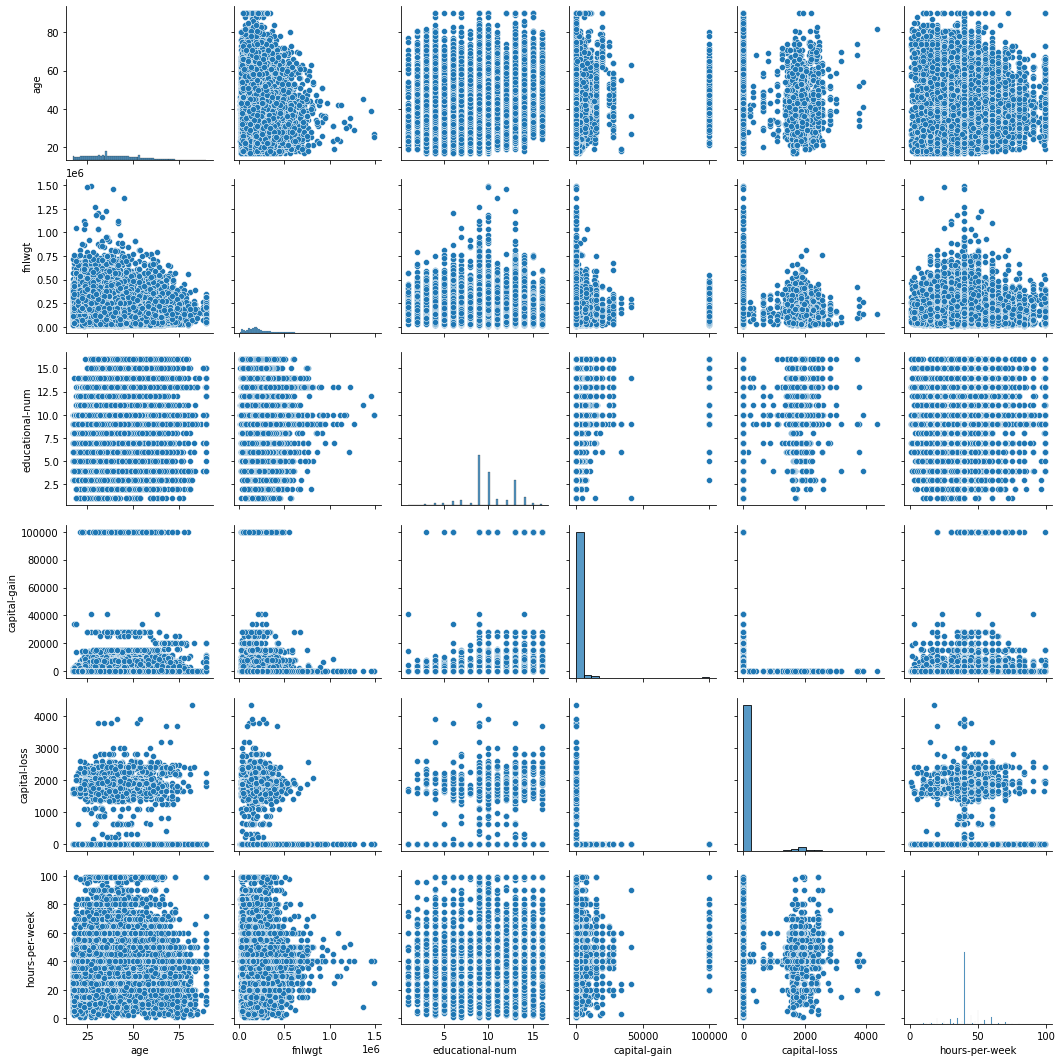

In [16]:
sns.pairplot(df)

##**Step 3: Univariate Analysis**
Univariate Analysis can be done for two kinds of variables- Categorical and Numerical.

#Categorical data 

In [17]:
#Categorical data 
categorical_cols = df.select_dtypes(exclude=[np.number])
print(categorical_cols.columns.values)

['workclass' 'education' 'marital-status' 'occupation' 'relationship'
 'race' 'gender' 'native-country' 'income']


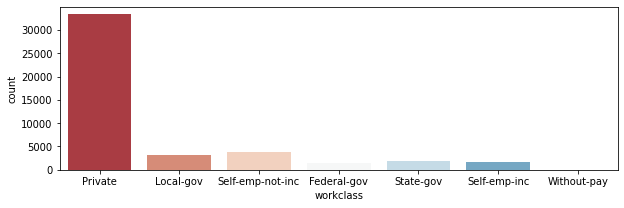

In [18]:
#Plotting Categorical data:
plt.figure(figsize=(10, 3))
sns.countplot(x='workclass', data=categorical_cols, palette='RdBu')

**Observation:** Most of the people work in private sectors.

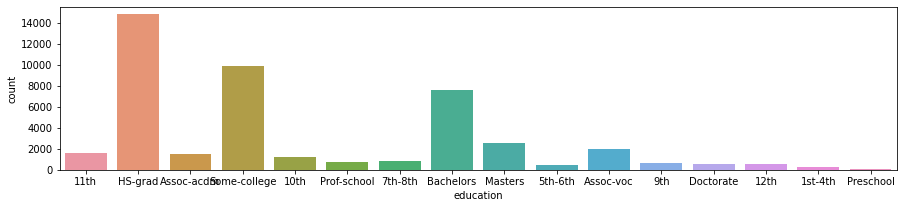

In [19]:
plt.figure(figsize=(15,3))
sns.countplot(df['education'])

**Observation:** The majority of the adults are HS-graduates. 

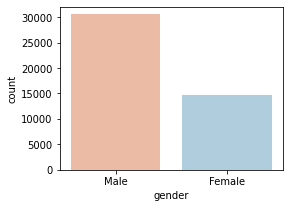

In [20]:
plt.figure(figsize=(4, 3))
sns.countplot(x='gender', data=categorical_cols, palette='RdBu')

**Observation:** Male population is 2 times more than Female..

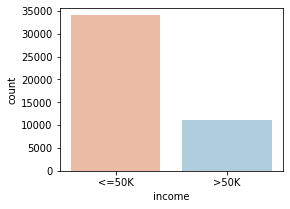

In [21]:
plt.figure(figsize=(4, 3))
sns.countplot(x='income', data=categorical_cols, palette='RdBu')

**Observation:** Majority of the people have an income of less than 50k i.e the data is skewed.

In [22]:
df['occupation'].value_counts()

Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: occupation, dtype: int64

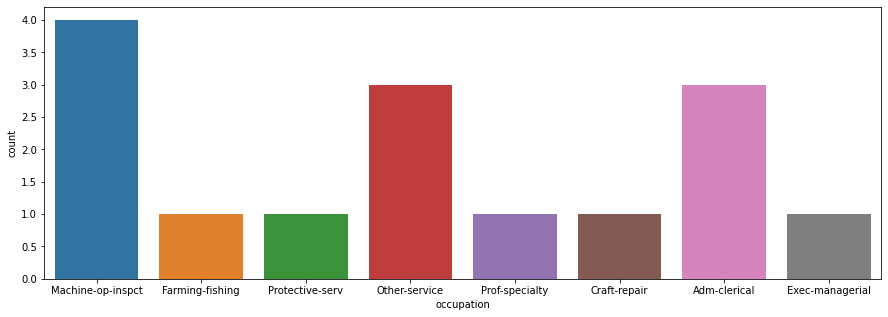

In [23]:
plt.figure(figsize=(15, 5))
data=df[:15]
sns.countplot(data['occupation'])

**Observation:** Most common occupations are: Machine-op-inspct,Adm-clerical

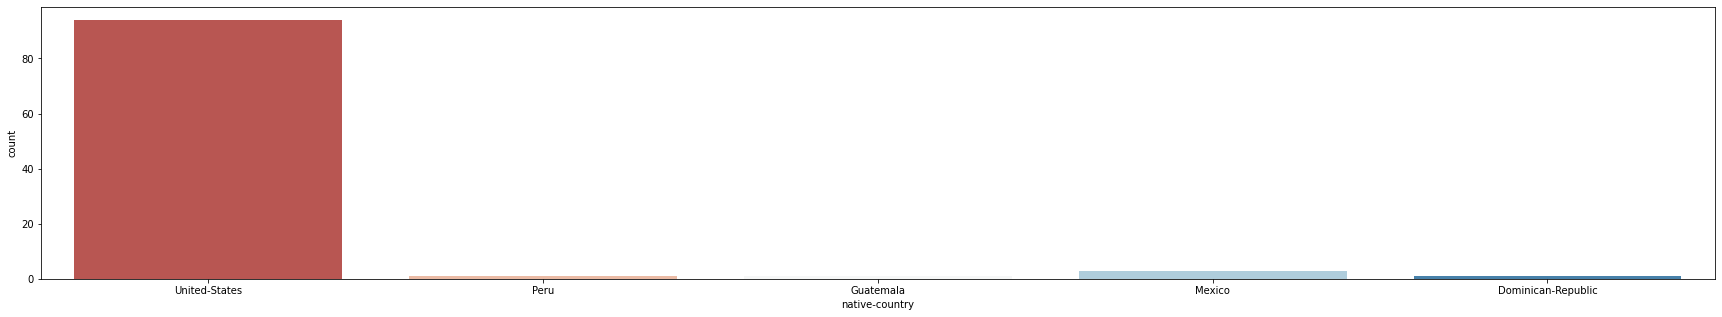

In [24]:
plt.figure(figsize=(30, 5))
sns.countplot(x='native-country', data=categorical_cols[:100], palette='RdBu')

**Observation:** Majority of the population is from United-States

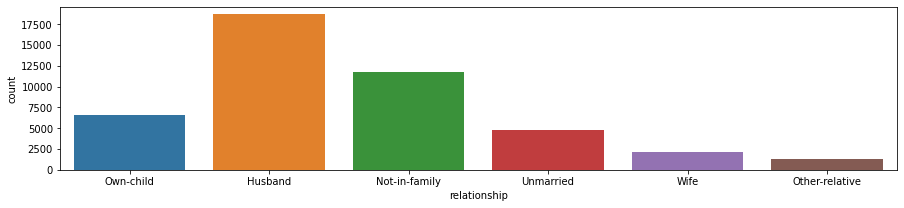

In [25]:
plt.figure(figsize=(15,3))
sns.countplot(df['relationship'])

**Observation:** In the given data most of the population has working husbands.

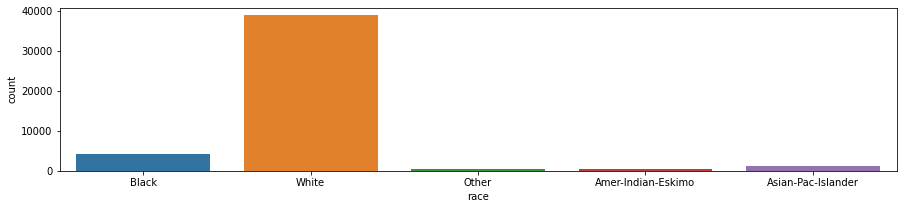

In [26]:
plt.figure(figsize=(15,3))
sns.countplot(df['race'])

**Observation:** As this data was collected from US majority of the population is white.

#Numerical Data

In [27]:
#Numerical data
numeric_cols = df.select_dtypes(include=[np.number])
print(numeric_cols.columns.values)

['age' 'fnlwgt' 'educational-num' 'capital-gain' 'capital-loss'
 'hours-per-week']


In [28]:
numeric_cols.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f6fd13c50>,
      dtype=object)

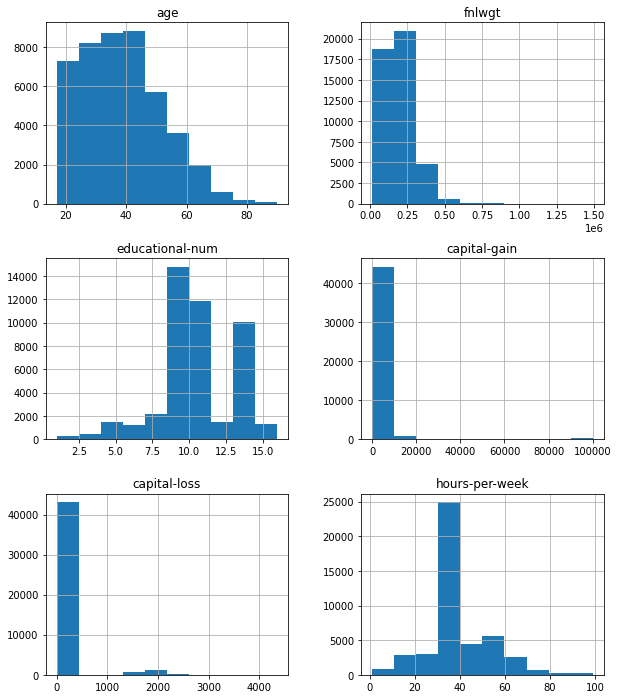

In [29]:
#Plotting histogram for numerical data:
numeric_cols.hist(figsize=(10,12))

**Observations:**
* **Age:** 
   * Most of the individuals have an age < 50 while the maximum age is around 90.
   * It is right skewed
   * Minimum and maximum age are 17 and 90 respectively
* **fnlwgt: weight corresponding to observation**
   * It is right skewed
* **capital-gain:**
   * Capital-gain most centered on 0 and few on 99k-100k
* **capital-loss:**
   * capital-loss most values centred at 0 and few are 2282.
   * There are very few people who invest.
* **hours-per-week**
   * Most of the people work around 40 hrs per week.
   * There are a few who don’t work and a few who work for almost 100 hours a week.

##**Step 4 : Bivariate Analysis**

**1. Relationship between two numerical Variables:**

In [30]:
np.corrcoef(df['hours-per-week'], df['age'])
#sns.countplot(y = df['hours-per-week'], hue = df['age'])
#plt.show()

array([[1.        , 0.10199224],
       [0.10199224, 1.        ]])

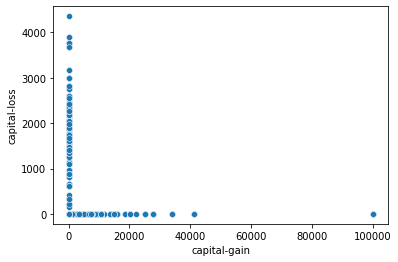

In [31]:
sns.scatterplot(x='capital-gain',y='capital-loss',data=df)

**Observation:** As the capital gain increases the capital loss decreases and vice-versa.

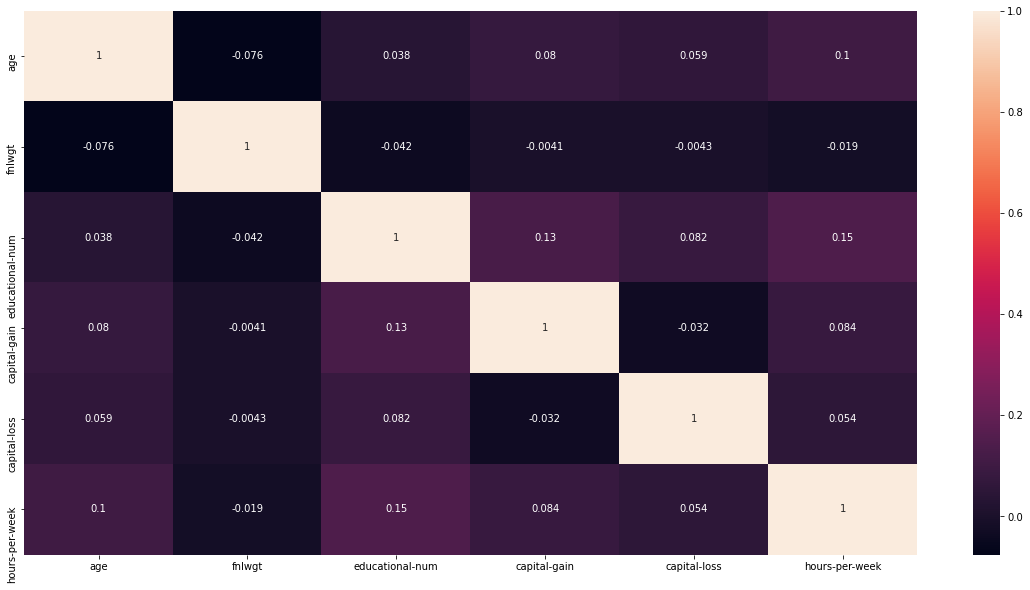

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

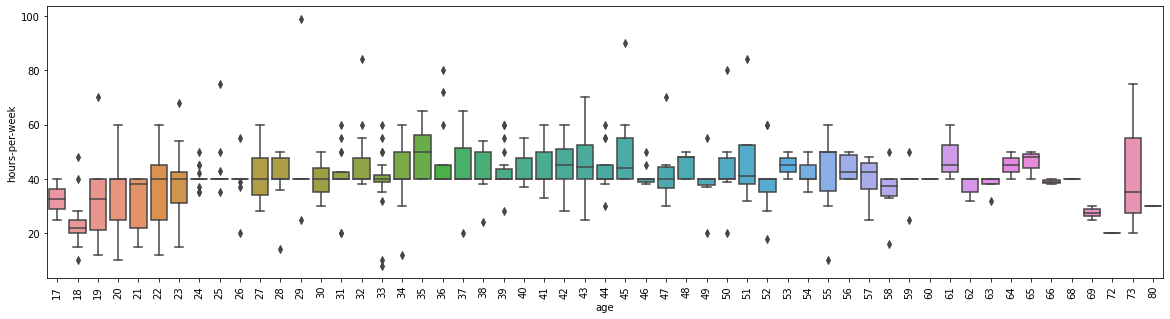

In [33]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df[:500], x='age', y='hours-per-week')
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.yticks(fontsize=10)

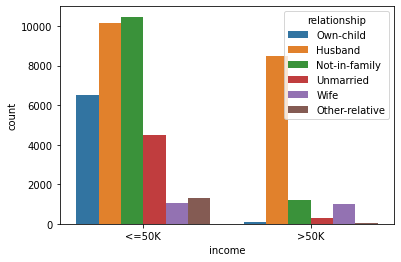

In [34]:
sns.countplot(df['income'],hue='relationship',data=df)

**2. Relationship between two categorical variables:**                       
['workclass' 'education' 'marital-status' 'occupation' 'relationship'
 'race' 'gender' 'native-country' 'income']

In [35]:
CrosstabResult=pd.crosstab(index=df['education'],columns=df['gender'])
print(CrosstabResult)

gender        Female   Male
education                  
10th             391    832
11th             556   1063
12th             179    398
1st-4th           56    166
5th-6th          109    340
7th-8th          197    626
9th              187    489
Assoc-acdm       585    922
Assoc-voc        675   1284
Bachelors       2330   5240
Doctorate        108    436
HS-grad         4661  10122
Masters          803   1711
Preschool         20     52
Prof-school      124    661
Some-college    3714   6185


In [36]:
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 2.956313547427433e-67


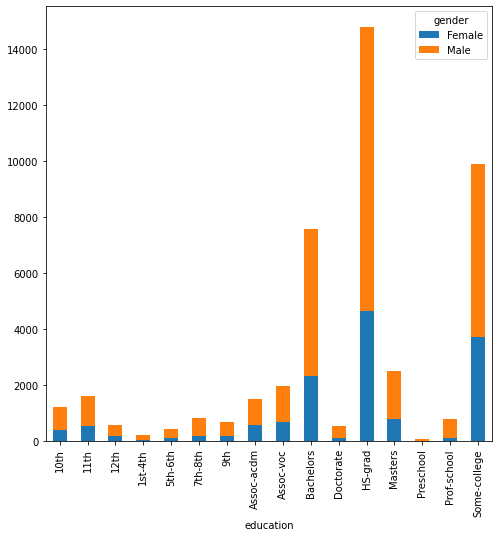

In [37]:
CrosstabResult.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

**Observation:** 
* Male population is more educated.
* Most of the male and female population are HS-grads.


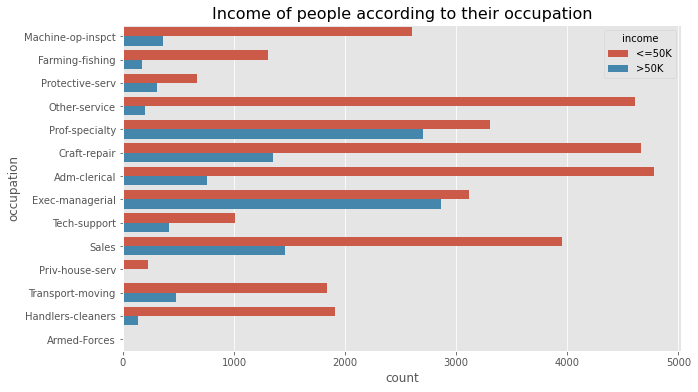

In [38]:
plt.style.use('ggplot')
plt.figure(figsize = (10,6))
plt.title("Income of people according to their occupation", fontsize = 16)
sns.countplot(y = df['occupation'], hue = df['income'])
plt.show()

**Observation:** Majority of people whose income is greater than 50K are either executive managers or they belong to any professional speciality. 

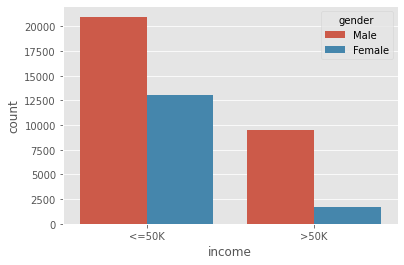

In [39]:
sns.countplot(df['income'],hue='gender',data=df)

**Observation:** 
* There are more males who are earning.
* Most of them are earning <=50K.

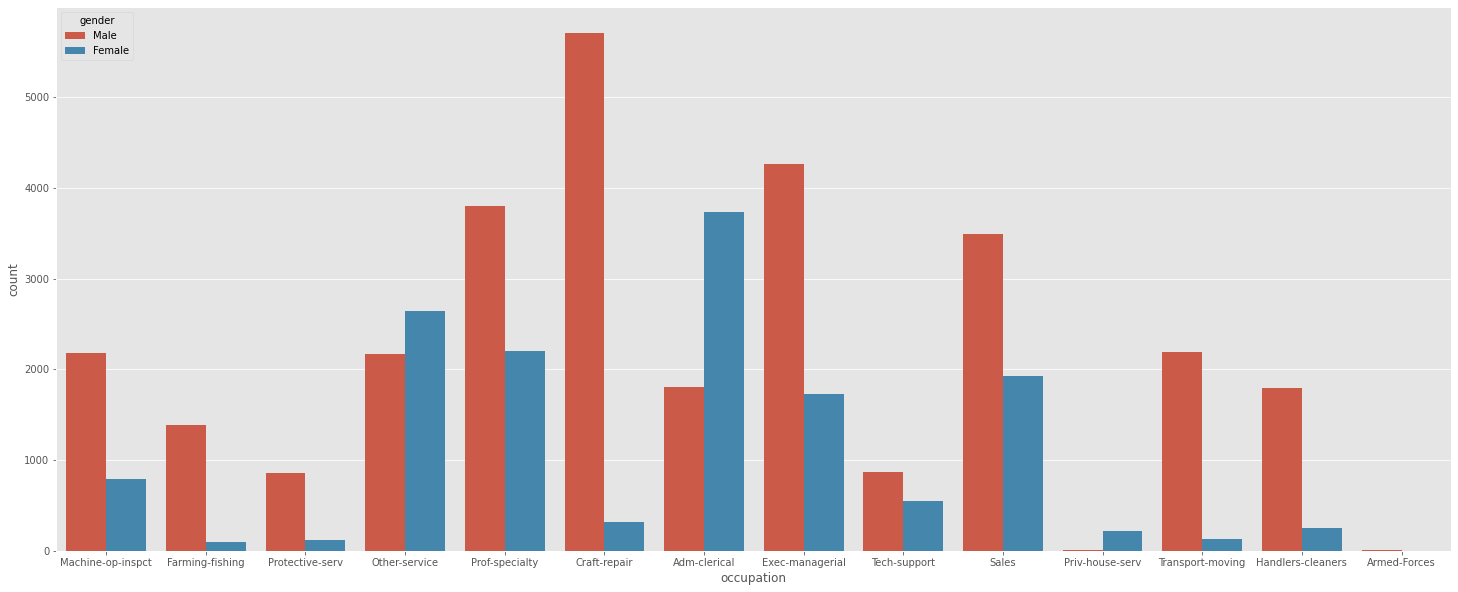

In [40]:
plt.figure(figsize=(25,10))
sns.countplot(x = df['occupation'], hue = df['gender'])
plt.show()


**Observation:**
* Majority of the male population has occupation: "craft-repair" , "Exec-managerial", prof-speciality , and Sales.

* Majority of the female population has occupation: "Adm-clerical" , "Prof-speciality" , and other services.

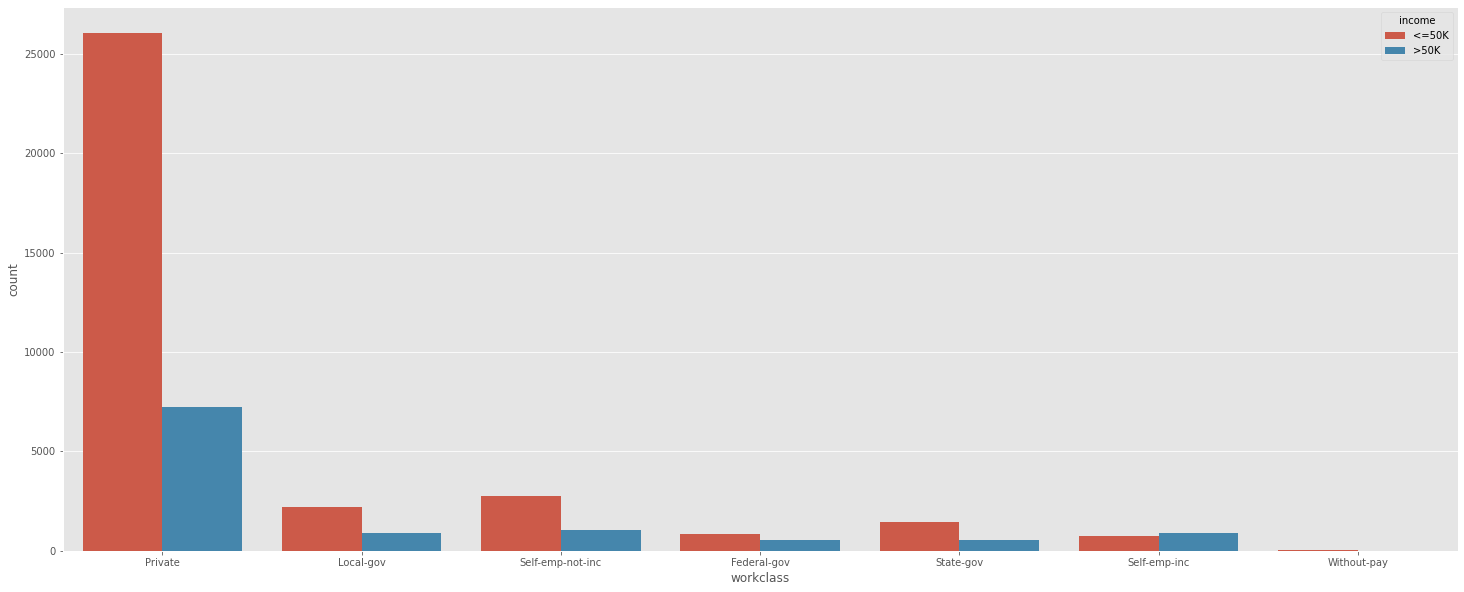

In [41]:
plt.figure(figsize=(25,10))
sns.countplot(df['workclass'],hue='income',data=df)
plt.show()

**Observation:** Private sector pays people more than 50K whereas population in other work classes have income < 50K .

**3. Relationship between numerical and categorical variables:**

['age' 'fnlwgt' 'educational-num' 'capital-gain' 'capital-loss''hours-per-week']      
['workclass' 'education' 'marital-status' 'occupation' 'relationship' 'race' 'gender' 'native-country' 'income']

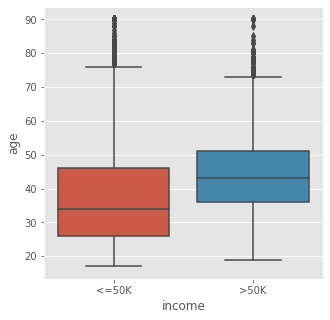

In [42]:
#Relationship between Income and Age:
plt.figure(figsize=(5,5))
sns.boxplot(x="income", y="age", data=df)
plt.show()

**Observation:** Older people are more likely to earn more than 50k a year as compared to their younger population.

Text(0, 0.5, 'Hours-per-week')

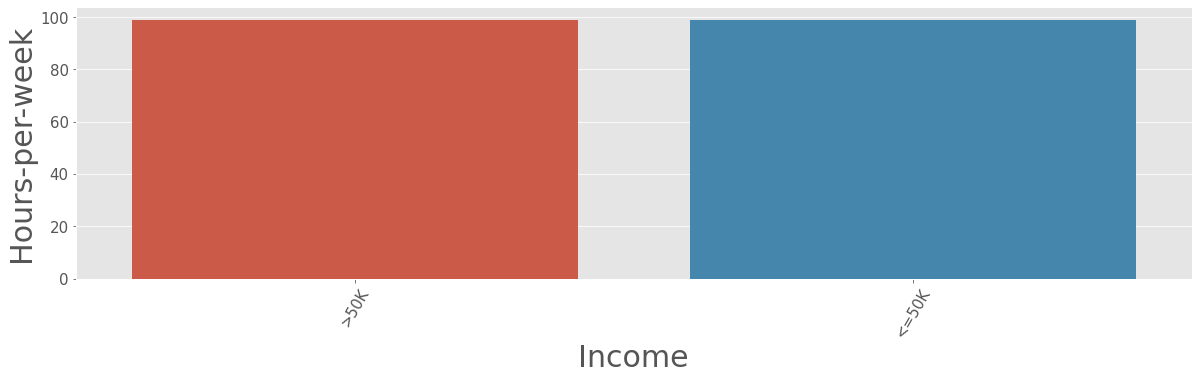

In [43]:
plt.figure(figsize=(20, 5))
data1 = df.sort_values(by=['hours-per-week'], ascending=False)
sns.barplot(x='income', y='hours-per-week', data=data1[:100])
plt.xticks(fontsize=15)
plt.xticks(rotation=60)
plt.yticks(fontsize=15)
plt.xlabel('Income', fontsize= 30)
plt.ylabel('Hours-per-week', fontsize = 30)

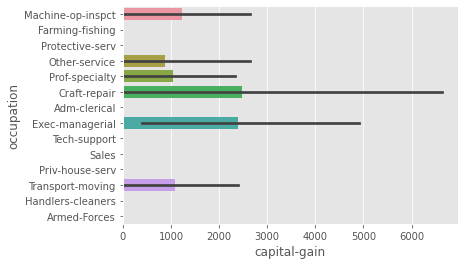

In [44]:
sns.barplot(x='capital-gain', y='occupation', data=df[:100])

**Observation:** Craft-repair and exec-managerial occupations have high capital-gain.

KeyboardInterrupt: ignored

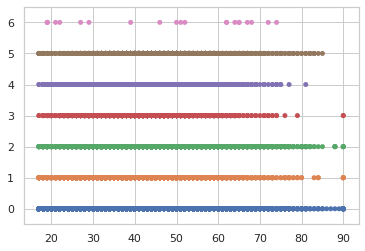

In [46]:
sns.set_theme(style="whitegrid")
ax = sns.swarmplot(x=df["age"],y=df["workclass"])

##**Step 5: Find and treat the OUTLIERS and MISSING VALUES in each column:**

**CAUSE FOR OUTLIERS:**
* Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
* Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
* Measurement Error:- It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
* Natural Outlier:- When an outlier is not artificial (due to error), it is a natural outlier. Most of real world data belong to this category.

**DIFFERENT OUTLIER DETECTION TECHNIQUE:**
1. Hypothesis Testing
2. Z-score method
3. Robust Z-score
4. I.Q.R method
5. Winsorization method(Percentile Capping)
6. DBSCAN Clustering
7. Isolation Forest
8. Visualizing the data


**Z-score:** Using Z score method,we can find out how many standard deviations value away from the mean.
![Z-score](https://i.pinimg.com/originals/cd/14/73/cd1473c4c82980c6596ea9f535a7f41c.jpg)

Figure in the left shows area under normal curve and how much area that standard deviation covers.
* 68% of the data points lie between + or - 1 standard deviation.
* 95% of the data points lie between + or - 2 standard deviation
* 99.7% of the data points lie between + or - 3 standard deviation
 
Z-score Formula: $Z -Score = \frac{X−Mean}{StandardDeviation}$        
If the z score of a data point is more than 3 (because it cover 99.7% of area), it indicates that the data value is quite different from the other values. It is taken as outliers.




BoxPlots of the features:


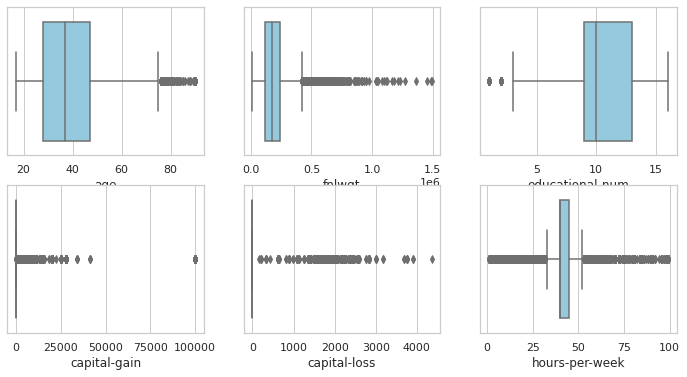

In [47]:
n_cols=['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']
plt.figure(figsize = (12,6))
for i in range(0, len(n_cols)):
    plt.subplot(2,3, i+1)
    sns.boxplot(df[n_cols[i]], color = 'skyblue')
print("BoxPlots of the features:")
plt.show()

In [48]:
from scipy.stats import zscore
zabs = np.abs(zscore(df.loc[:,'capital-gain':'hours-per-week']))
print(np.shape(np.where(zabs >= 3)))
new_df = df[(zabs < 3).all(axis = 1)]
new_df

(2, 3013)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


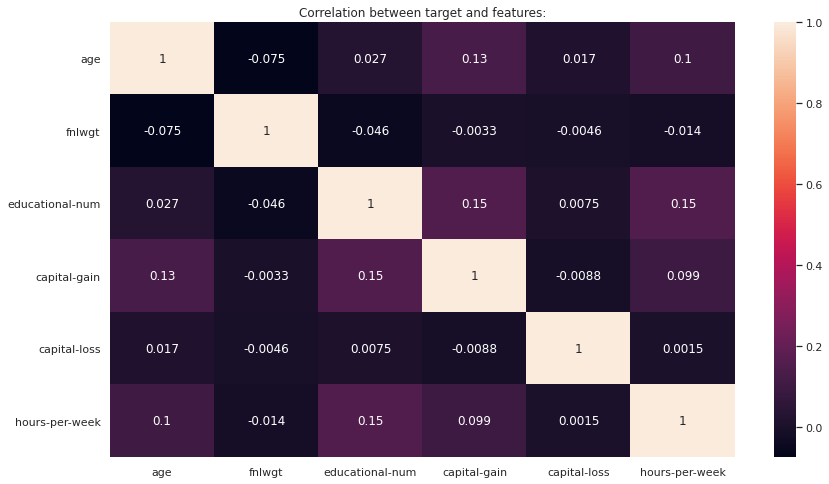

In [49]:
plt.figure(figsize = (14, 8))
plt.title("Correlation between target and features:")
sns.heatmap(new_df.corr(), annot = True)
plt.show()

**Step 6: Perform feature transformation**         
For Numerical Features -> Do Column Standardization
For Categorical -> if more than 2 categories, use dummy variables. Otherwise convert the feature to Binary.


In [54]:
from sklearn.preprocessing import MinMaxScaler
df_sk = new_df.copy()
column = ['age', 'fnlwgt', 'educational-num', 'hours-per-week','capital-gain']
df_sk[column] = MinMaxScaler().fit_transform(np.array(df_sk[column]))
df_sk

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,Private,0.144270,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.00000,0.0,0.492958,United-States,<=50K
1,0.287671,Private,0.051499,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.00000,0.0,0.633803,United-States,<=50K
2,0.150685,Local-gov,0.218864,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.00000,0.0,0.492958,United-States,>50K
3,0.369863,Private,0.099249,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.34882,0.0,0.492958,United-States,>50K
5,0.232877,Private,0.125234,10th,0.333333,Never-married,Other-service,Not-in-family,White,Male,0.00000,0.0,0.352113,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,Private,0.164925,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.00000,0.0,0.464789,United-States,<=50K
48838,0.315068,Private,0.095220,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.00000,0.0,0.492958,United-States,>50K
48839,0.561644,Private,0.093551,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.00000,0.0,0.492958,United-States,<=50K
48840,0.068493,Private,0.127128,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.00000,0.0,0.211268,United-States,<=50K


In [56]:
data=pd.get_dummies(df_sk,drop_first=True)
data.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cl

In [57]:
data.describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
count,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,...,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000,42254.000000
mean,0.291691,0.119398,0.603544,0.026007,0.000907,0.497419,0.068656,0.743835,0.032754,0.079732,0.043546,0.000473,0.036825,0.013301,0.004994,0.010153,0.018436,0.015525,0.033322,0.043901,0.164174,0.010271,0.331448,0.052705,0.001633,0.013987,0.221872,0.000663,0.454324,0.012283,0.331140,0.032068,0.028565,0.000308,0.134804,0.127609,0.031642,0.046859,0.067591,0.109694,...,0.003550,0.002367,0.001822,0.003006,0.002201,0.001018,0.003408,0.002603,0.000757,0.004402,0.000994,0.002012,0.001562,0.000426,0.000568,0.000402,0.003148,0.001207,0.000805,0.002225,0.002390,0.001941,0.000473,0.020732,0.001089,0.000521,0.001018,0.006248,0.001846,0.001444,0.003929,0.000473,0.002201,0.001160,0.000615,0.000568,0.911961,0.001799,0.000544,0.228310
std,0.181082,0.071725,0.168276,0.105850,0.025448,0.151932,0.252872,0.436519,0.177995,0.270881,0.204085,0.021751,0.188334,0.114560,0.070490,0.100250,0.134524,0.123630,0.179479,0.204878,0.370438,0.100826,0.470739,0.223447,0.040378,0.117437,0.415511,0.025734,0.497915,0.110147,0.470629,0.176183,0.166583,0.017538,0.341518,0.333658,0.175047,0.211340,0.251046,0.312511,...,0.059476,0.048591,0.042650,0.054742,0.046863,0.031885,0.0582

**Step 7: Build various Machine Learning models**
By considering ‘income’ as target variable.


In [59]:
target=data['income_>50K']
input=data.iloc[:,:53]

In [60]:
input

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black
0,0.109589,0.144270,0.400000,0.00000,0.0,0.492958,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0.287671,0.051499,0.533333,0.00000,0.0,0.633803,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.150685,0.218864,0.733333,0.00000,0.0,0.492958,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0.369863,0.099249,0.600000,0.34882,0.0,0.492958,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0.232877,0.125234,0.333333,0.00000,0.0,0.352113,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.164925,0.733333,0.00000,0.0,0.464789,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
48838,0.315068,0.095220,0.533333,0.00000,0.0,0.492958,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48839,0.561644,0.093551,0.533333,0.00000,0.0,0.492958,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
48840,0.068493,0.127128,0.533333,0.00000,0.0,0.211268,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


**Importing Decision Tree classifier**

In [61]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

**Splitting the data into train and test with test ratio:20%**

In [62]:
x_train,x_test,y_train,y_test=train_test_split(input,target,test_size=0.3)

In [63]:
model=DecisionTreeClassifier(criterion='entropy',random_state=0)


**Fitting the model with train data**

In [64]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

**Prediction using test data**

In [65]:
y_pred=model.predict(x_test)

**Model Accuracy**

In [66]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=model,X=x_train,y=y_train,cv=10)
acc=acc.mean()*100

In [67]:
print('Decision Tree Accuracy : ',round(np.array(acc).mean(),2))

Decision Tree Accuracy :  80.81
